# PROJETO 1 - Ciência dos Dados
 ## Ellen Beatriz Shen | 2B Engenharia

 ___

## Perguntas a serem respondidas:

**Pergunta 1:** É possível constatar que o "PIB per capita" da Espanha, em relação ao PIB mundial e dos países da Europa, foi aumentado ao entrar na União Europeia? Podemos dizer que ocorreu uma evolução relativa melhor?


## Explicação da hipótese e mecanismo

A **União Europeia** é um bloco econômico e político constituido por 28 países europeus. Seus objetivos são ajudar os países-membros no seu desenvolvimento econômico, dar mais igualdade política e econômica à Europa, melhorar as condições econômicas e de trabalho dos cidadãos europeus, reduzir as desigualdades econômicas e sociais entre todas as regiões que compõem o bloco, garantir a permanência de um ambiente pacífico e harmonioso em toda a Europa. Suas características são livre circulação das pessoas pelos Estados-membros, livre circulação de mercadorias entre os Estados-membros, integração política, adoção de uma moeda única, o Euro.

- Como um dos objetivos principais da UE é o desenvolvimento econômico de seus países-membros, a hipótese busca comparar os dados de países pertencentes e não pertencentes a este bloco econômico. A análise vai ser baseada em um grupo de países que são economicamente similares, e que somente alguns entraram para a UE. Assim podemos utilizar variáveis como o 'PIB per capita' ao longo dos anos para a comparação.

## Bases de dados utilizadas

- dados retirados de https://www.gapminder.org/data/
- Variáveis:
 - PIB per capita
 - Renda


___

## Análise dos Dados 

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from funcoes import *

In [2]:
#Leitura dos Dados
PIB = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
renda = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')
mundo = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_126307.xls', sheet_name="Data", skiprows=3)

In [3]:
#Trocando o indice dos dados.
idx_pib = PIB.set_index("country")
idx_r = renda.set_index("country")
idx_mundo= mundo.set_index("Country Name")

dados_pib = idx_pib.iloc[:,161:219]
dados_r = idx_r.iloc[:,161:219]
PIB_m = idx_mundo.iloc[:,3:59]

dados_PIB = dados_pib.dropna()
dados_renda = dados_r.dropna()
PIB_mundo = PIB_m.dropna()

In [4]:
#Lista de países da Europa e União Europeia para utilizar posteriormente como filtros
europa = ['Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina',  'Cyprus',  'Czech Republic','Denmark', 'Spain',  'Estonia', 'Finland',  'France', 'United Kingdom',  'Greece', 'Croatia', 'Hungary', 'Ireland',  'Iceland',  'Italy',  'Lithuania', 'Latvia',  'Moldova', 'Malta',  'Montenegro', 'Netherlands',  'Poland',  'Portugal',  'Romania',  'Slovak Republic', 'Slovenia',  'Sweden',  'Turkey', 'Luxembourg', 'Germany']
uniao_europeia = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


### PIB e Renda Espanha

In [5]:
#Filtração dos dados apenas da espanha

#PIB da espanha
PIB_espanha = dados_PIB.loc["Spain",:]
#Filtro do PIB antes e depois de 1986
PIB_espanha_antes = PIB_espanha[(PIB_espanha.index>1962) & (PIB_espanha.index<1986)]
PIB_espanha_depois = PIB_espanha[(PIB_espanha.index>1986)]

#Renda da espanha
renda_espanha = dados_renda.loc["Spain",:]
#Filtro do PIB antes e depois de 1986
renda_espanha_antes = renda_espanha[(renda_espanha.index>1962) & (renda_espanha.index<1986)]
renda_espanha_depois = renda_espanha[(renda_espanha.index>1986)]

Vamos começar plotando a evolução do indicador "PIB per capita" e "Renda" ao longo do tempo.

- Gráficos do PIB da Espanha antes e depois de 1986:


Text(0, 0.5, 'PIB Espanha')

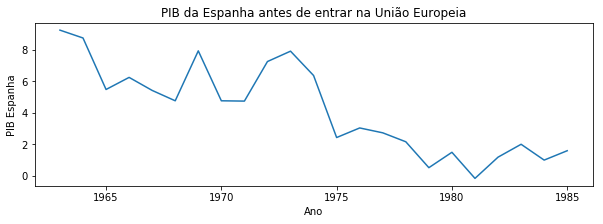

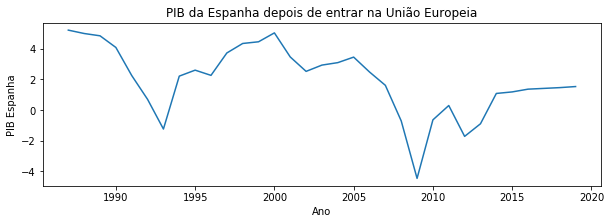

In [6]:
print("- Gráficos do PIB da Espanha antes e depois de 1986:")

plt.figure(figsize=(10,3))
plt.plot(PIB_espanha_antes.index,PIB_espanha_antes)
plt.title('PIB da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

plt.figure(figsize=(10,3))
plt.plot(PIB_espanha_depois.index,PIB_espanha_depois)
plt.title('PIB da Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('PIB Espanha')

- Gráfico da Renda da Espanha antes e depois de 1986:


Text(0, 0.5, 'Renda Espanha')

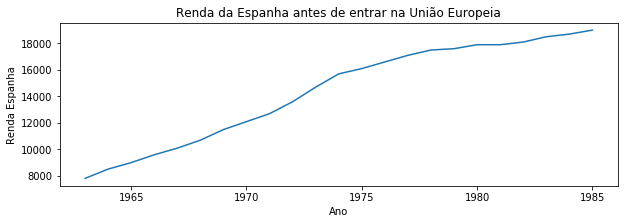

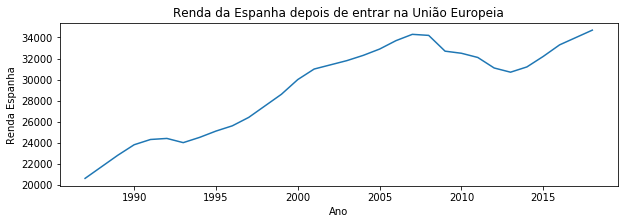

In [11]:
print("- Gráfico da Renda da Espanha antes e depois de 1986:")

plt.figure(figsize=(10,3))
plt.plot(renda_espanha_antes.index, renda_espanha_antes)
plt.title('Renda da Espanha antes de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('Renda Espanha')

plt.figure(figsize=(10,3))
plt.plot(renda_espanha_depois.index, renda_espanha_depois)
plt.title('Renda da Espanha depois de entrar na União Europeia')
plt.xlabel('Ano')
plt.ylabel('Renda Espanha')

É possivel analisar que há uma diferença no crescimento dos dados, porém ainda continuam parecidos, ficando difícil de poder retirar conclusões.

Podemos então utilizar um gráfico de dispersão para ambas variáveis e calcular sua linha de tendência.

In [12]:
fig = plt.figure(figsize = (10,5))

#Trocando o index
index_antes = PIB_espanha_antes.reset_index()
index_depois = PIB_espanha_depois.reset_index()

reta_pib(index_antes["index"], index_antes.Spain,"pink")
reta_pib(index_depois["index"], index_depois.Spain,"purple")

Ajuste linear entre:
Coeficiente linear: 708.0862450592886
Coeficiente angular: -0.3565750988142293


NameError: name 'plt' is not defined

<Figure size 720x360 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (10,5))

#Trocando o index
index_renda_antes = renda_espanha_antes.reset_index()
index_renda_depois = renda_espanha_depois.reset_index()

reta_renda(index_renda_antes["index"], index_renda_antes.Spain,"pink")
reta_renda(index_renda_depois["index"], index_renda_depois.Spain,"purple")

- Após comparar os gráficos, percebemos que o PIB é afetado de maneira que seu coeficiente angular dos dados após a entrada para a UE é maior do que o coeficiente dos dados antes. Fazendo com que a queda do PIB seja mais constante.

- Já a Renda não foi muito afetada, pois seus coeficientes angulares continuam iguais, resultando em um crescimento quase constante antes e depois.

### PIB e Renda Europa e União Europeia

Ainda não conseguimos concluir muita coisa a partir desses dados, então vamos analisar os dados somente dos países europeus. E logo depois, separar entre os países-membros e não-membros da UE.

In [ ]:
#Europa

#Criando uma coluna "Europa" para caso o páis pertencer ou não ao continente europeu.
dataframe_pib_europa = dados_PIB.loc[:,"Europa"] = "não"
dataframe_pib_europa = dados_PIB.loc[europa, "Europa"] = "sim"

#Filtro do PIB dos países da Europa
PIB_europa = dados_PIB.loc[dados_PIB.Europa=="sim",:]

#Criando uma coluna "Europa" para caso o páis pertencer ou não ao continente europeu.
dataframe_renda_europa = dados_renda.loc[:,"Europa"] = "não"
dataframe_renda_europa =  dados_renda.loc[europa, "Europa"] = "sim"

#Filtro da Renda dos países da Europa
renda_europa = dados_renda.loc[dados_renda.Europa=="sim",:]

- Média do PIB e Renda da Europa:

In [ ]:
descricao_pib_europa = PIB_europa.describe()
medias_pib_europa = descricao_pib_europa.loc["mean",:]
media_total_pib_europa = medias_pib_europa.mean()

descricao_renda_europa = renda_europa.describe()
medias_renda_europa = descricao_renda_europa.loc["mean",:]
media_total_renda_europa = medias_renda_europa.mean()

#Filtração dos dados, antes e depois
media_pib_europa_depois = medias_pib_europa[(medias_pib_europa.index>1986)]
media_renda_europa_depois = medias_renda_europa[(medias_renda_europa.index>1986)]

media_pib_mundo_depois = medias_pib_mundo[(medias_pib_mundo.index>1986)]
media_renda_mundo_depois = medias_renda_mundo[(medias_renda_mundo.index>1986)]

Podemos comparar as médias da Espanha e da Europa ao longo dos anos.

In [ ]:
#Médias antes e depois

#PIB
media_PIB_espanha = PIB_espanha.mean()
media_PIB_espanha_antes = PIB_espanha_antes.mean()
media_PIB_espanha_depois = PIB_espanha_depois.mean()

#Renda
media_renda_espanha = renda_espanha.mean()
media_renda_espanha_antes = renda_espanha_antes.mean()
media_renda_espanha_depois = renda_espanha_depois.mean()

- Podemos fazer um join para comparar os dados:

In [ ]:
dados_comparacao_pib_europa = {'País/Continente': ['Espanha', 'Europa'],'Média': [media_PIB_espanha, media_total_pib_europa]}
dados_comparacao_renda_europa = {'País/Continente': ['Espanha', 'Europa'],'Média': [media_renda_espanha, media_total_renda_europa]}

media_pib_espanhaXeuropa = pd.DataFrame(dados_comparacao_pib_europa, columns=['País/Continente', 'Média'])
idx_x = media_pib_espanhaXeuropa.set_index("País/Continente")
media_renda_espanhaXeuropa = pd.DataFrame(dados_comparacao_renda_europa, columns=['País/Continente', 'Média'])
idx_y = media_renda_espanhaXeuropa.set_index("País/Continente")

dataframe_comparacao = idx_x.join(idx_y, how='inner', lsuffix='_PIB', rsuffix='_Renda')
dataframe_comparacao

Aparentemente a Espanha tem uma média melhor do que o continente todo. 

In [ ]:
#Resetar o index
index_medias_pib_europa = media_pib_europa_depois.reset_index()
index_pib_espanha= PIB_espanha_depois.reset_index()

fig = plt.figure(figsize = (10,5))

plt.scatter(index_medias_pib_europa["index"] , index_medias_pib_europa["mean"])
reta_pib_europa_1986(index_medias_pib_europa["index"] , index_medias_pib_europa["mean"],"red")

plt.scatter(index_pib_espanha["index"], index_pib_espanha.Spain)
reta_pib_europa_1986(index_pib_espanha["index"], index_pib_espanha.Spain,"pink")


In [ ]:
#Resetar o index
index_medias_renda_europa = media_renda_europa_depois.reset_index()
index_renda_espanha= renda_espanha_depois.reset_index()

fig = plt.figure(figsize = (10,5))

plt.scatter(index_medias_renda_europa["index"] , index_medias_renda_europa["mean"])
reta_renda_europa_1986(index_medias_renda_europa["index"] , index_medias_renda_europa["mean"],"red")

plt.scatter(index_renda_espanha["index"], index_renda_espanha.Spain)
reta_renda_europa_1986(index_renda_espanha["index"], index_renda_espanha.Spain,"pink")


In [ ]:
descricao_renda_mundo = dados_renda.describe()
medias_renda_mundo = descricao_renda_mundo.loc["mean",:]
media_total_renda_mundo = medias_renda_mundo.mean()

descricao_pib_mundo = dados_PIB.describe()
medias_pib_mundo = descricao_pib_mundo.loc["mean",:]
media_total_pib_mundo = medias_pib_mundo.mean()

In [ ]:
#Resetar o index
index_medias_pib_mundo = media_pib_mundo_depois.reset_index()

fig = plt.figure(figsize = (10,5))
plt.scatter(index_pib_espanha["index"], index_pib_espanha.Spain)
reta2(index_pib_espanha["index"], index_pib_espanha.Spain,"pink")

plt.scatter(index_medias_pib_mundo["index"] , index_medias_pib_mundo["mean"])
reta2(index_medias_pib_mundo["index"] , index_medias_pib_mundo["mean"],"black")

In [ ]:
#Resetar o index
index_medias_renda_mundo = media_renda_mundo_depois.reset_index()

fig = plt.figure(figsize = (10,5))
plt.scatter(index_renda_espanha["index"], index_renda_espanha.Spain)
reta2(index_renda_espanha["index"], index_renda_espanha.Spain,"pink")

plt.scatter(index_medias_renda_mundo["index"] , index_medias_renda_mundo["mean"])
reta2(index_medias_renda_mundo["index"] , index_medias_renda_mundo["mean"],"black")

## Conclusão